In [3]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist   # This itself has dataset in it, no need of separate dataset
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Check NumPy version
print("NumPy version:", np.__version__)

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check Keras version (included in TensorFlow)
print("Keras version:", keras.__version__)

NumPy version: 1.26.4
TensorFlow version: 2.17.1
Keras version: 3.5.0


In [2]:
# Load and Preprocess the MNIST Dataset
# The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).
(x_train, y_train), (x_test, y_test) = mnist.load_data()






11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# TODO: Normalize the data and convert labels to one-hot encoding
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verify the shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


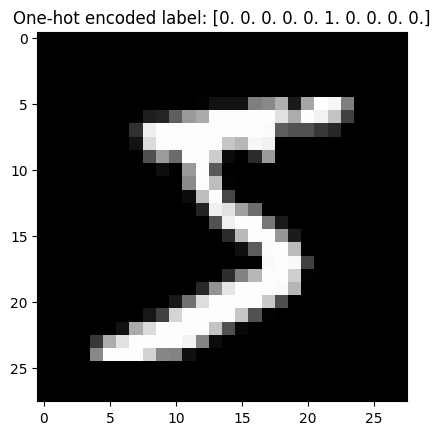

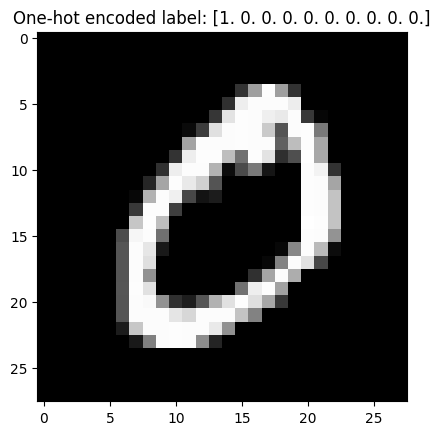

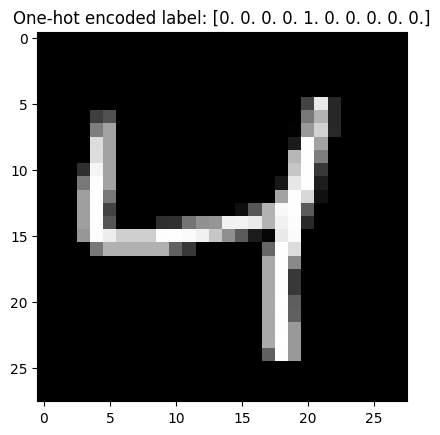

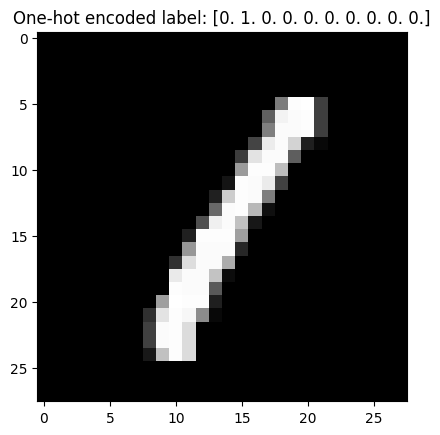

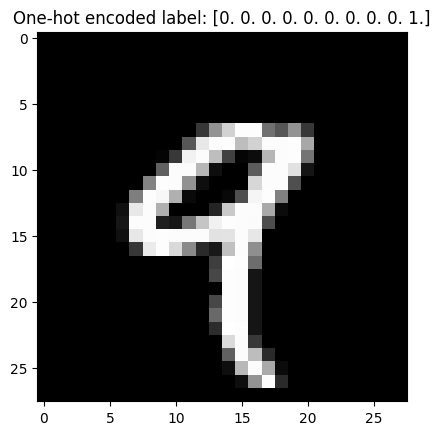

In [6]:

# Function to display an image and its one-hot encoded label
def display_image_and_label(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"One-hot encoded label: {y_train[index]}")
    plt.show()

# Display some examples
for i in range(5):
    display_image_and_label(i)

In [10]:
# TODO: Following is a Function to Create a Model



def create_model(activation_function):
    """
    Create a simple feedforward neural network with the specified activation function.

    Parameters:
    activation_function (str): Activation function to use in the hidden layers.

    Returns:
    model: A compiled Keras model.
    """
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input image
        Dense(128, activation=activation_function),  # Hidden layer with specified activation function
        Dense(10, activation='softmax')  # Output layer with softmax activation for classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [11]:
# Experiment with Different Activation Functions
activation_functions = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activation_functions:
    print(f"\nTraining model with {activation} activation function...\n")
    model = create_model(activation)
    # Train the model
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), verbose=1)

    # Record results
    results[activation] = {
        "training_accuracy": history.history['accuracy'][-1],
        "validation_accuracy": history.history['val_accuracy'][-1],
        "training_loss": history.history['loss'][-1],
        "validation_loss": history.history['val_loss'][-1]
    }


Training model with relu activation function...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6064 - loss: 1.6496 - val_accuracy: 0.8611 - val_loss: 0.5709
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8701 - loss: 0.5180 - val_accuracy: 0.8987 - val_loss: 0.3910
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8912 - loss: 0.3924 - val_accuracy: 0.9072 - val_loss: 0.3374
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9033 - loss: 0.3464 - val_accuracy: 0.9108 - val_loss: 0.3142
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9084 - loss: 0.3238 - val_accuracy: 0.9156 - val_loss: 0.2936

Training model with sigmoid activation function...

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2229 - loss: 2.2378 - val_accuracy: 0.6529 - val_loss: 1.8343
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6410 - loss: 1.6365 - val_accuracy: 0.7889 - val_loss: 1.0877
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7

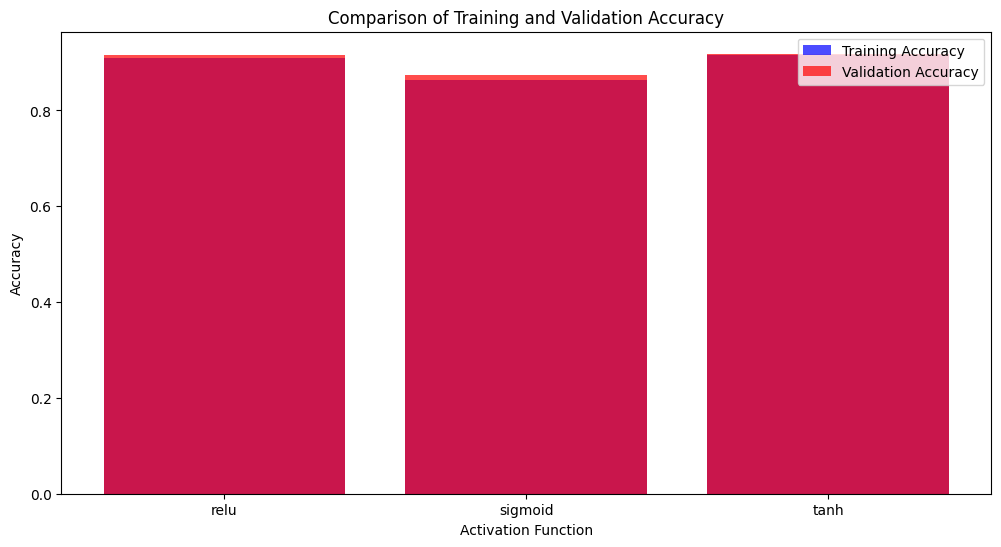

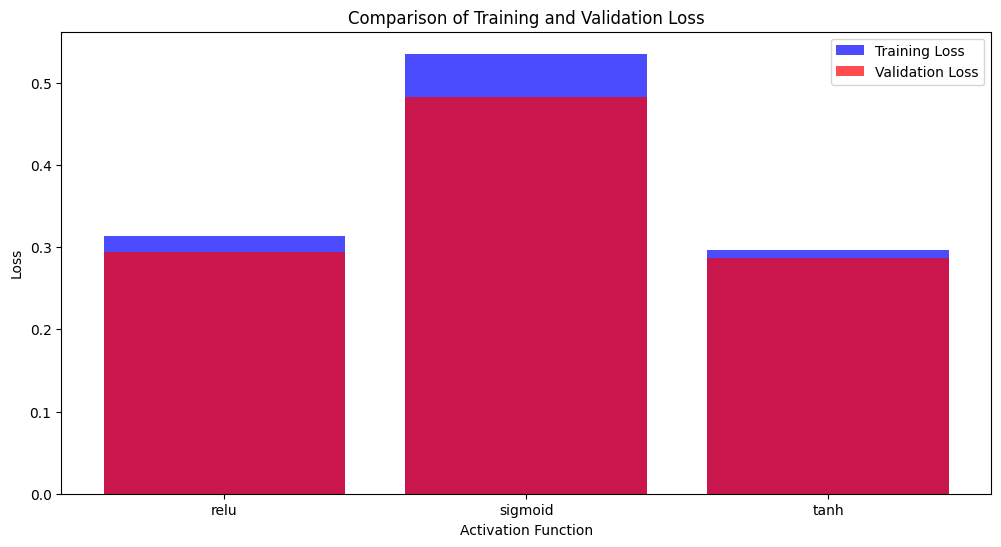

In [12]:
# Compare Results
# TODO: Visualize the comparison of accuracy and loss for each activation function.
# Hint: Use matplotlib to plot bar charts comparing training and validation accuracy and loss.

import matplotlib.pyplot as plt

# Extract the recorded results
activation_functions = ['relu', 'sigmoid', 'tanh']
training_accuracies = [results[activation]['training_accuracy'] for activation in activation_functions]
validation_accuracies = [results[activation]['validation_accuracy'] for activation in activation_functions]
training_losses = [results[activation]['training_loss'] for activation in activation_functions]
validation_losses = [results[activation]['validation_loss'] for activation in activation_functions]

# Plot training accuracy
plt.figure(figsize=(12, 6))
plt.bar(activation_functions, training_accuracies, color='blue', alpha=0.7, label='Training Accuracy')
plt.bar(activation_functions, validation_accuracies, color='red', alpha=0.7, label='Validation Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(12, 6))
plt.bar(activation_functions, training_losses, color='blue', alpha=0.7, label='Training Loss')
plt.bar(activation_functions, validation_losses, color='red', alpha=0.7, label='Validation Loss')
plt.xlabel('Activation Function')
plt.ylabel('Loss')
plt.title('Comparison of Training and Validation Loss')
plt.legend()
plt.show()


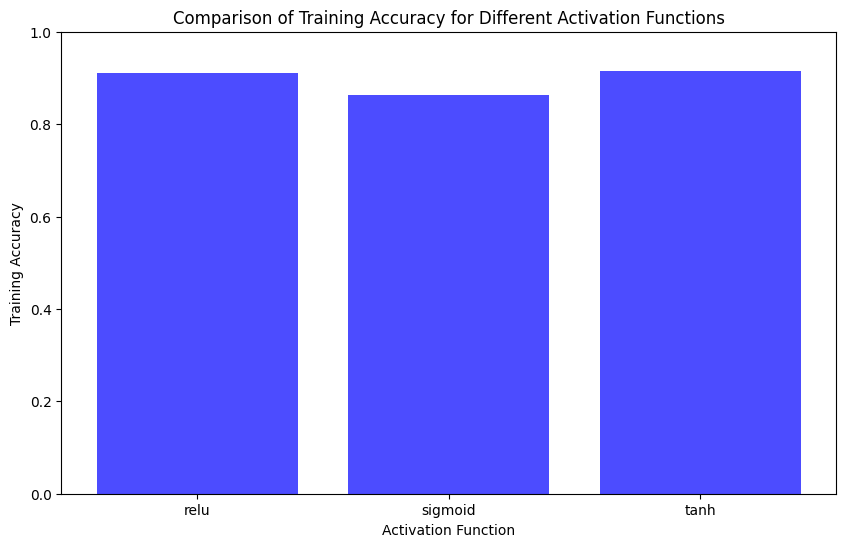

In [13]:
# TODO: Complete the visualization below.
# Plot training accuracy for each activation function.
training_accuracies = [results[activation]['training_accuracy'] for activation in activation_functions]

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, training_accuracies, color='blue', alpha=0.7)
plt.xlabel('Activation Function')
plt.ylabel('Training Accuracy')
plt.title('Comparison of Training Accuracy for Different Activation Functions')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.show()

In [ ]:
# TODO: Write a short analysis of which activation function performed best and why.


#Best Performer: Tanh achieved the highest validation accuracy and lowest validation loss, indicating it generalized best in this specific task.
#Why Tanh Excelled: The dataset and model architecture likely benefited from the zero-centered property of Tanh, which helped with optimization. The slight advantage over ReLU might be due to the specific nature of the problem or dataset.